## Predict on completely new data (web scraped)

In [1]:
import timm
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
path = Path(os.environ["PROJECTS"])/"shoes-classifier"
(path/"data").ls()

(#6) [Path('/home/fabrizio/projects/shoes-classifier/data/models'),Path('/home/fabrizio/projects/shoes-classifier/data/resnet18-fine-tuned-stage-1.pkl'),Path('/home/fabrizio/projects/shoes-classifier/data/.ipynb_checkpoints'),Path('/home/fabrizio/projects/shoes-classifier/data/test_extra'),Path('/home/fabrizio/projects/shoes-classifier/data/test'),Path('/home/fabrizio/projects/shoes-classifier/data/train')]

In [3]:
!ls  {path/"data"/"test_extra"}

adidas	converse  nike


In [4]:
# Clean up some potentially broken images
test_data_path = path/"data"/"test_extra"
failed = verify_images(get_image_files(test_data_path))
print(f"removing {len(failed)} files")
if failed:
    for fn in failed: fn.unlink()

removing 0 files


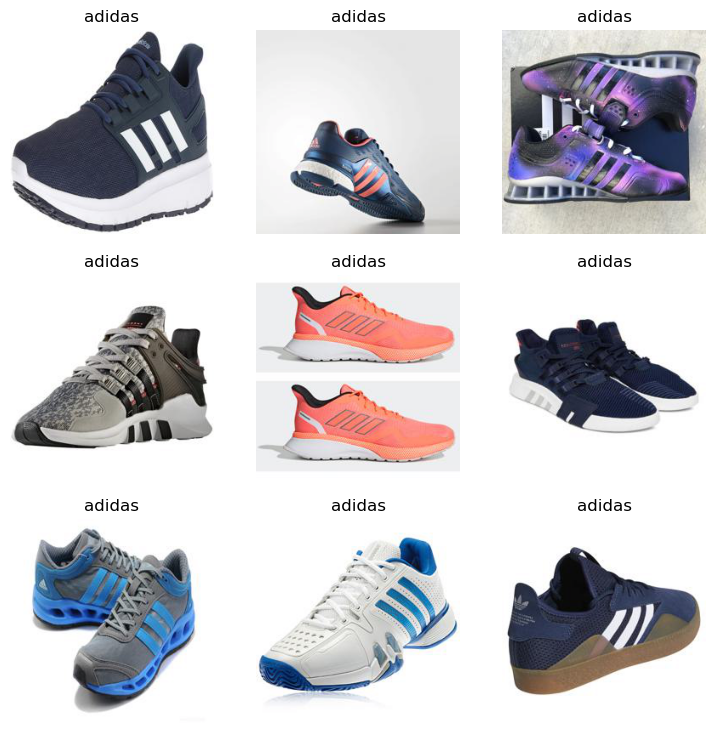

In [5]:
learn = load_learner("models/best_model.pkl")
learn.path = Path(".")
test_dl = learn.dls.test_dl(get_image_files(path/"data"/"test_extra"), with_labels=True)
test_dl.show_batch()

In [6]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

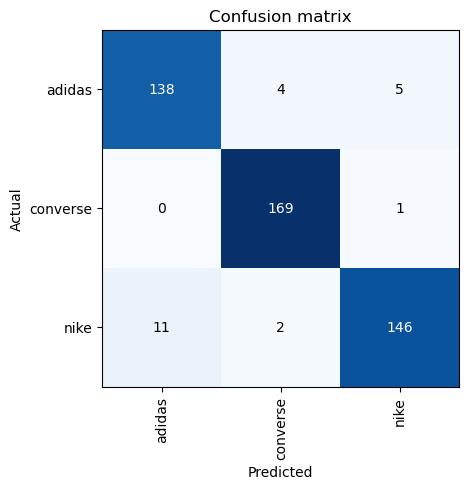

In [7]:
interp.plot_confusion_matrix()

In [ ]:
preds, targs = learn.get_preds(dl=test_dl)

In [ ]:
accuracy(preds, targs)

In [ ]:
preds_tta, _ = learn.tta(dl=test_dl)

In [ ]:
accuracy(preds_tta, targs)

In [ ]:
interp.plot_top_losses(21, nrows=3)